# **Import Libraries**

In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
from xgboost import XGBRegressor
import joblib

# **Data Exploring**

In [139]:
df=pd.read_csv('/content/kc_house_data.csv')

In [140]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [141]:
df.shape

(21613, 21)

In [142]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [143]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [145]:
df.isna().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [146]:
df.dtypes

,0
id,int64
date,object
price,float64
bedrooms,int64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64
view,int64


# **Data Cleaning**

In [147]:
df_clean=df.copy()

# Clean 'date' column

In [148]:
df_clean['date'].unique()

array(['20141013T000000', '20141209T000000', '20150225T000000',
       '20150218T000000', '20140512T000000', '20140627T000000',
       '20150115T000000', '20150415T000000', '20150312T000000',
       '20150403T000000', '20140527T000000', '20140528T000000',
       '20141007T000000', '20150124T000000', '20140731T000000',
       '20140529T000000', '20141205T000000', '20150424T000000',
       '20140514T000000', '20140826T000000', '20140703T000000',
       '20140516T000000', '20141120T000000', '20141103T000000',
       '20140626T000000', '20141201T000000', '20140624T000000',
       '20150302T000000', '20141110T000000', '20141203T000000',
       '20140613T000000', '20141230T000000', '20150213T000000',
       '20140620T000000', '20140715T000000', '20140811T000000',
       '20140707T000000', '20141028T000000', '20140729T000000',
       '20140718T000000', '20150325T000000', '20140716T000000',
       '20150428T000000', '20150311T000000', '20140916T000000',
       '20150217T000000', '20141231T0000

In [149]:
df_clean['date'] = pd.to_datetime(df_clean['date'], format='%Y%m%dT%H%M%S')
df_clean['year'] = df_clean['date'].dt.year

In [150]:
#drop 'date' column
df_clean.drop(columns=['date'], inplace=True)

# Clean 'bedrooms' column

In [151]:
df_clean['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33])

In [152]:
df_clean['bedrooms'].value_counts()

,count
bedrooms,
3,9824
4,6882
2,2760
5,1601
6,272
1,199
7,38
0,13
8,13


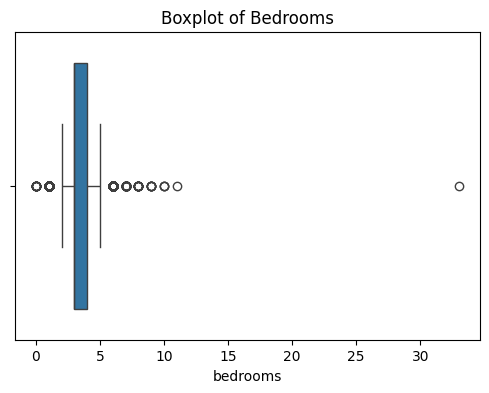

In [153]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df_clean['bedrooms'])
plt.title("Boxplot of Bedrooms")
plt.show()

In [154]:
# removing outliers
df_clean = df_clean[(df_clean['bedrooms'] != 0) & (df_clean['bedrooms'] != 33)]
df_clean['bedrooms'] = df_clean['bedrooms'].apply(lambda x: 7 if x > 7 else x)

# Clean 'bathrooms' column

In [155]:
df_clean['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 0.  , 5.25, 6.  , 0.5 ,
       5.5 , 6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [156]:
df_clean['bathrooms'].value_counts()

,count
bathrooms,
2.50,5377
1.00,3851
1.75,3047
2.25,2047
2.00,1930
1.50,1445
2.75,1185
3.00,753
3.50,731


In [157]:
# Remove unrealistic values (<1) and cap values >6 to 6
df_clean = df_clean[df_clean['bathrooms'] >= 1]
df_clean['bathrooms'] = df_clean['bathrooms'].apply(lambda x: 6 if x > 6 else x)

# Clean 'sqft_living' Column

In [158]:
df_clean['sqft_living'].describe()

,sqft_living
count,21521.000000
mean,2084.381720
std,916.867372
min,390.000000
25%,1430.000000
50%,1920.000000
75%,2550.000000
max,13540.000000


In [159]:
Q1 = 1430
Q3 = 2550
IQR = Q3 - Q1

# Outlier threshold
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers above upper bound
outliers = df_clean[df_clean['sqft_living'] > upper_bound]
print("Number of extreme large houses:", len(outliers))

Number of extreme large houses: 571


In [160]:
df_clean['sqft_living'] = df_clean['sqft_living'].apply(lambda x: 4230 if x > 4230 else x)

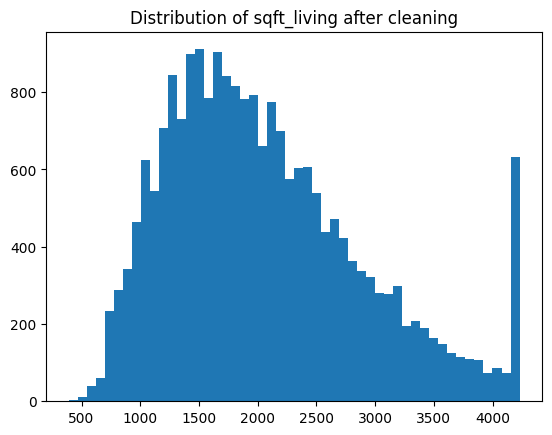

In [161]:
plt.hist(df_clean['sqft_living'], bins=50)
plt.title('Distribution of sqft_living after cleaning')
plt.show()

# 'sqft_lot' column

In [162]:
df_clean['sqft_lot'].describe()

,sqft_lot
count,2.152100e+04
mean,1.509624e+04
std,4.147093e+04
min,5.200000e+02
25%,5.040000e+03
50%,7.617000e+03
75%,1.066100e+04
max,1.651359e+06


In [163]:
Q1 = df_clean['sqft_lot'].quantile(0.25)
Q3 = df_clean['sqft_lot'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

# Cap values above upper bound
df_clean['sqft_lot'] = df_clean['sqft_lot'].apply(lambda x: upper_bound if x > upper_bound else x)

# 'floors' column

In [164]:
df_clean['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [165]:
df_clean['floors'].value_counts()

,count
floors,
1.0,10606
2.0,8231
1.5,1905
3.0,611
2.5,161
3.5,7


In [166]:
df_clean['floors'].describe()

,floors
count,21521.000000
mean,1.495539
std,0.539886
min,1.000000
25%,1.000000
50%,1.500000
75%,2.000000
max,3.500000


 Note: There are a few outliers in 'floors' with very low frequency,

  but they represent realistic house structures, so we'll keep them as is.


# 'waterfront' column

In [167]:
df_clean['waterfront'].unique()

array([0, 1])

In [168]:
df_clean['waterfront'].value_counts()

,count
waterfront,
0,21364
1,157


# 'view' column

In [169]:
df_clean['view'].unique()

array([0, 3, 4, 2, 1])

In [170]:
df_clean['view'].value_counts()

,count
view,
0,19411
2,955
3,509
1,330
4,316


# 'condition' column

In [171]:
df_clean['condition'].unique()

array([3, 5, 4, 1, 2])

In [172]:
df_clean['condition'].value_counts()

,count
condition,
3,13984
4,5653
5,1691
2,165
1,28


# 'grade' column

In [173]:
df_clean['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4, 13])

In [174]:
df_clean['grade'].value_counts()

,count
grade,
7,8956
8,6064
9,2615
6,2010
10,1134
11,399
5,227
12,89
4,14


# 'sqft_above' column

In [175]:
df_clean['sqft_above'].describe()

,sqft_above
count,21521.000000
mean,1791.923424
std,827.037378
min,390.000000
25%,1200.000000
50%,1560.000000
75%,2220.000000
max,9410.000000


In [176]:
# Capping outliers for sqft_above using IQR
Q1 = df_clean['sqft_above'].quantile(0.25)
Q3 = df_clean['sqft_above'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

# Apply capping
df_clean['sqft_above'] = df_clean['sqft_above'].apply(lambda x: upper_bound if x > upper_bound else x)

In [177]:
df_clean['sqft_basement'].describe()

,sqft_basement
count,21521.000000
mean,292.458297
std,443.148343
min,0.000000
25%,0.000000
50%,0.000000
75%,570.000000
max,4820.000000


# 'sqft_basement' column

In [178]:
df_clean['sqft_basement'].describe()

,sqft_basement
count,21521.000000
mean,292.458297
std,443.148343
min,0.000000
25%,0.000000
50%,0.000000
75%,570.000000
max,4820.000000


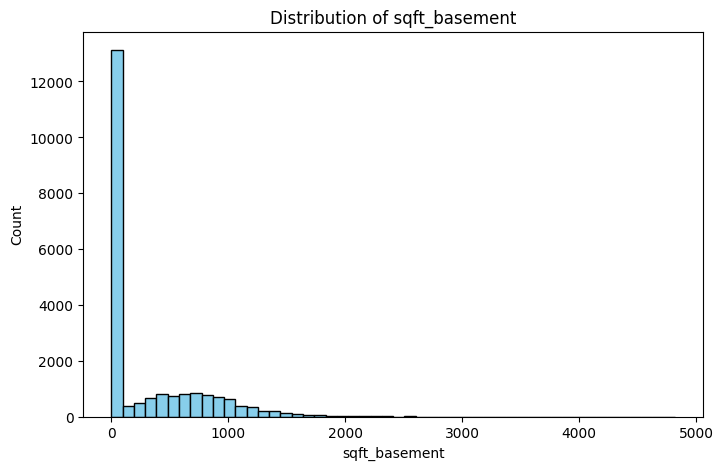

In [179]:
plt.figure(figsize=(8,5))
plt.hist(df_clean['sqft_basement'], bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of sqft_basement")
plt.xlabel("sqft_basement")
plt.ylabel("Count")
plt.show()

In [180]:
# Add binary column (Has basement or not)
df_clean['has_basement'] = df_clean['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)

# Capping outliers
Q1 = df_clean['sqft_basement'].quantile(0.25)
Q3 = df_clean['sqft_basement'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR

# Apply capping
df_clean['sqft_basement'] = np.where(df_clean['sqft_basement'] > upper_limit,
                               upper_limit,
                               df_clean['sqft_basement'])


Text(0, 0.5, 'Count')

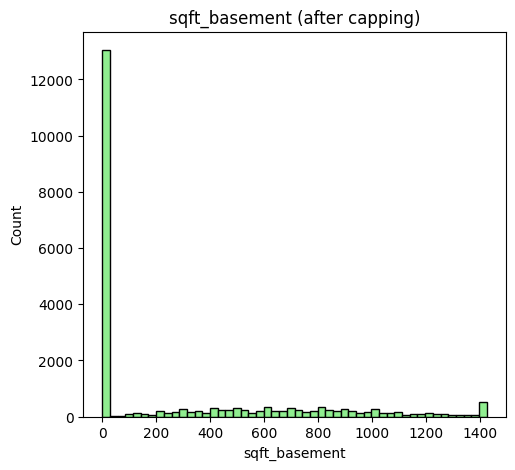

In [181]:
plt.figure(figsize=(12,5))

# Distribution after capping
plt.subplot(1,2,1)
plt.hist(df_clean['sqft_basement'], bins=50, color='lightgreen', edgecolor='black')
plt.title("sqft_basement (after capping)")
plt.xlabel("sqft_basement")
plt.ylabel("Count")

# 'yr_built' column

In [182]:
df_clean['yr_built'].unique()

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907, 1958,
       2012, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970, 2015, 1934,
       1912, 1938, 1919, 1906, 1936, 1935])

In [183]:
df_clean['yr_built'].describe()

,yr_built
count,21521.000000
mean,1971.095906
std,29.353133
min,1900.000000
25%,1952.000000
50%,1975.000000
75%,1997.000000
max,2015.000000


In [184]:
# Convert year built to house age
current_year = 2025
df_clean['house_age'] = current_year - df_clean['yr_built']
df_clean[['yr_built', 'house_age']].head(10)

,yr_built,house_age
0,1955,70
1,1951,74
2,1933,92
3,1965,60
4,1987,38
5,2001,24
6,1995,30
7,1963,62
8,1960,65
9,2003,22


#  'yr_renovated' column

In [185]:
df_clean['yr_renovated'].unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944])

In [186]:
df_clean['yr_renovated'].describe()

,yr_renovated
count,21521.000000
mean,84.393801
std,401.664267
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,2015.000000


In [187]:
# Create a binary column (is the house renovated or not?)
df_clean['is_renovated'] = df_clean['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

# 2. Create years_since_renovation using current year if yr_sold is not available
current_year = 2025
df_clean['years_since_renovation'] = df_clean.apply(
    lambda row: (current_year - row['yr_renovated']) if row['yr_renovated'] > 0 else (current_year - row['yr_built']),
    axis=1
)

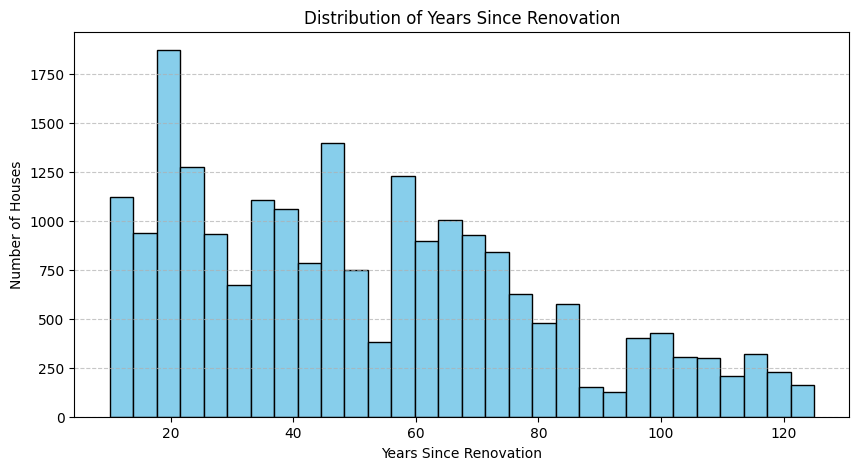

In [188]:
# 4. Plot distribution
plt.figure(figsize=(10,5))
plt.hist(df_clean['years_since_renovation'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Years Since Renovation')
plt.xlabel('Years Since Renovation')
plt.ylabel('Number of Houses')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 'zipcode' column

In [189]:
df_clean['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98055, 98014, 98039])

In [190]:
df_clean['zipcode'].describe()

,zipcode
count,21521.000000
mean,98077.897960
std,53.501415
min,98001.000000
25%,98033.000000
50%,98065.000000
75%,98117.000000
max,98199.000000


# 'lat' & 'long'

In [191]:
df_clean[['lat','long']].describe()

,lat,long
count,21521.000000,21521.000000
mean,47.560153,-122.213961
std,0.138566,0.140370
min,47.155900,-122.519000
25%,47.471100,-122.328000
50%,47.571900,-122.230000
75%,47.678000,-122.125000
max,47.777600,-121.315000


In [192]:
fig = px.scatter_mapbox(
    df_clean,
    lat="lat",
    lon="long",
    color="price",          # اللون يعكس السعر
    size="price",           # الحجم يعكس السعر
    color_continuous_scale="Viridis",
    size_max=15,
    zoom=10,
    mapbox_style="carto-positron",  # شكل الخريطة
    hover_data={"lat": True, "long": True, "price": True}
)

fig.update_layout(title="House Prices by Location")
fig.show()

# 'sqft_living15' & 'sqft_lot15'

In [193]:
df_clean[['sqft_living15','sqft_lot15']].describe()

,sqft_living15,sqft_lot15
count,21521.000000,21521.000000
mean,1988.456717,12745.741880
std,685.168644,27284.681048
min,399.000000,651.000000
25%,1490.000000,5100.000000
50%,1840.000000,7620.000000
75%,2370.000000,10080.000000
max,6210.000000,871200.000000


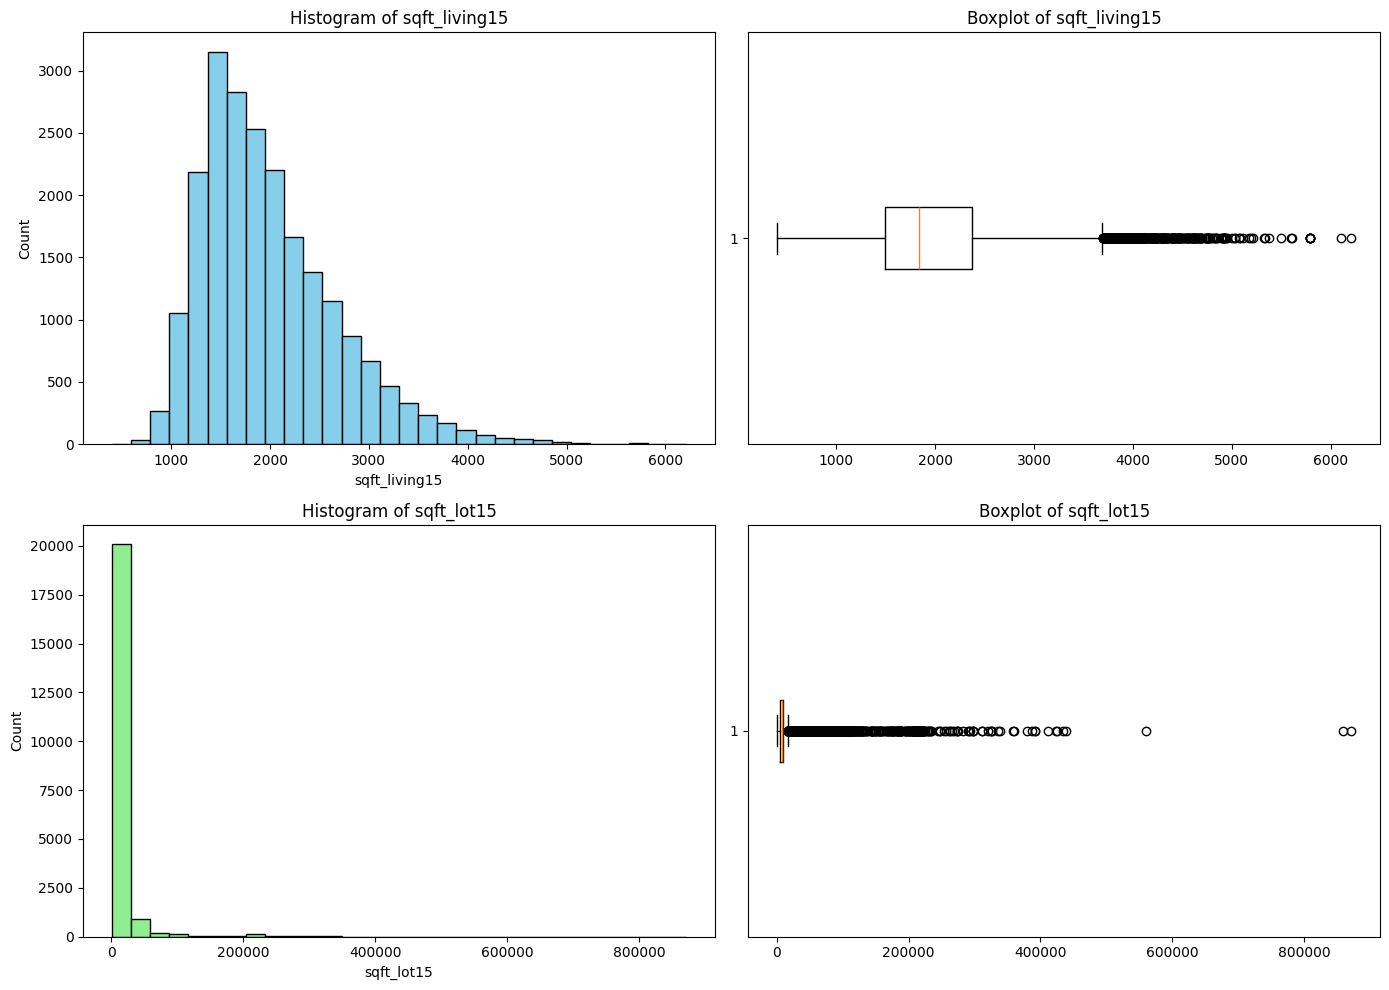

In [194]:
fig, axes = plt.subplots(2, 2, figsize=(14,10))

# Histogram sqft_living15
axes[0,0].hist(df_clean['sqft_living15'], bins=30, color='skyblue', edgecolor='black')
axes[0,0].set_title('Histogram of sqft_living15')
axes[0,0].set_xlabel('sqft_living15')
axes[0,0].set_ylabel('Count')

# Boxplot sqft_living15
axes[0,1].boxplot(df_clean['sqft_living15'], vert=False)
axes[0,1].set_title('Boxplot of sqft_living15')

# Histogram sqft_lot15
axes[1,0].hist(df_clean['sqft_lot15'], bins=30, color='lightgreen', edgecolor='black')
axes[1,0].set_title('Histogram of sqft_lot15')
axes[1,0].set_xlabel('sqft_lot15')
axes[1,0].set_ylabel('Count')

# Boxplot sqft_lot15
axes[1,1].boxplot(df_clean['sqft_lot15'], vert=False)
axes[1,1].set_title('Boxplot of sqft_lot15')

plt.tight_layout()
plt.show()


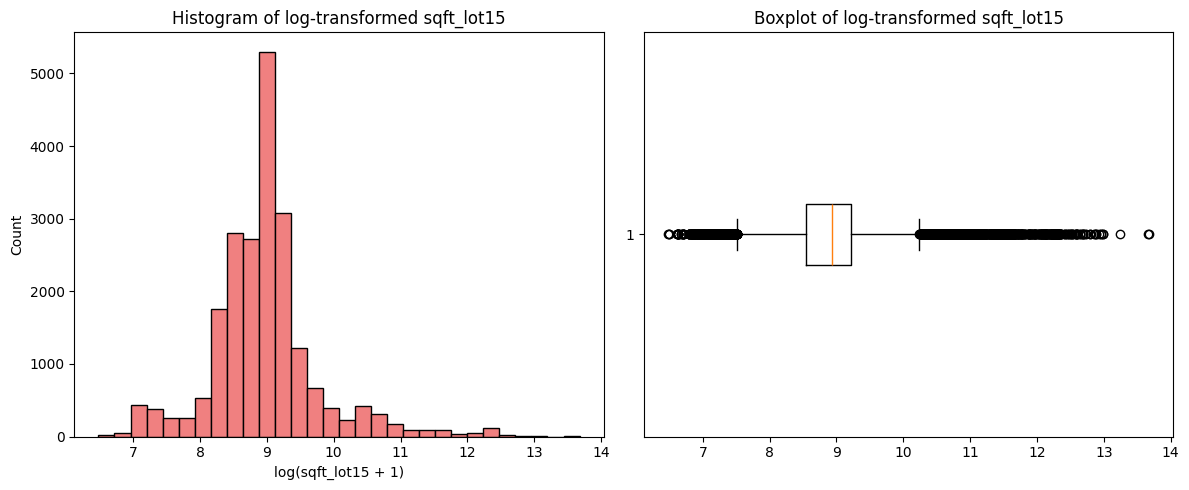

In [195]:
# Log-transform
df_clean['sqft_lot15_log'] = np.log1p(df_clean['sqft_lot15'])

fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Histogram after log-transform
axes[0].hist(df_clean['sqft_lot15_log'], bins=30, color='lightcoral', edgecolor='black')
axes[0].set_title('Histogram of log-transformed sqft_lot15')
axes[0].set_xlabel('log(sqft_lot15 + 1)')
axes[0].set_ylabel('Count')

# Boxplot after log-transform
axes[1].boxplot(df_clean['sqft_lot15_log'], vert=False)
axes[1].set_title('Boxplot of log-transformed sqft_lot15')

plt.tight_layout()
plt.show()

In [196]:
df_clean = df_clean.drop(columns=['sqft_lot15'])

#**EDA**

In [197]:
df_eda=df_clean.copy()

In [198]:
df_eda.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'year', 'has_basement', 'house_age', 'is_renovated',
       'years_since_renovation', 'sqft_lot15_log'],
      dtype='object')

In [199]:
df_eda.shape

(21521, 25)

In [200]:
df_eda = df_eda.drop(['id'], axis=1)

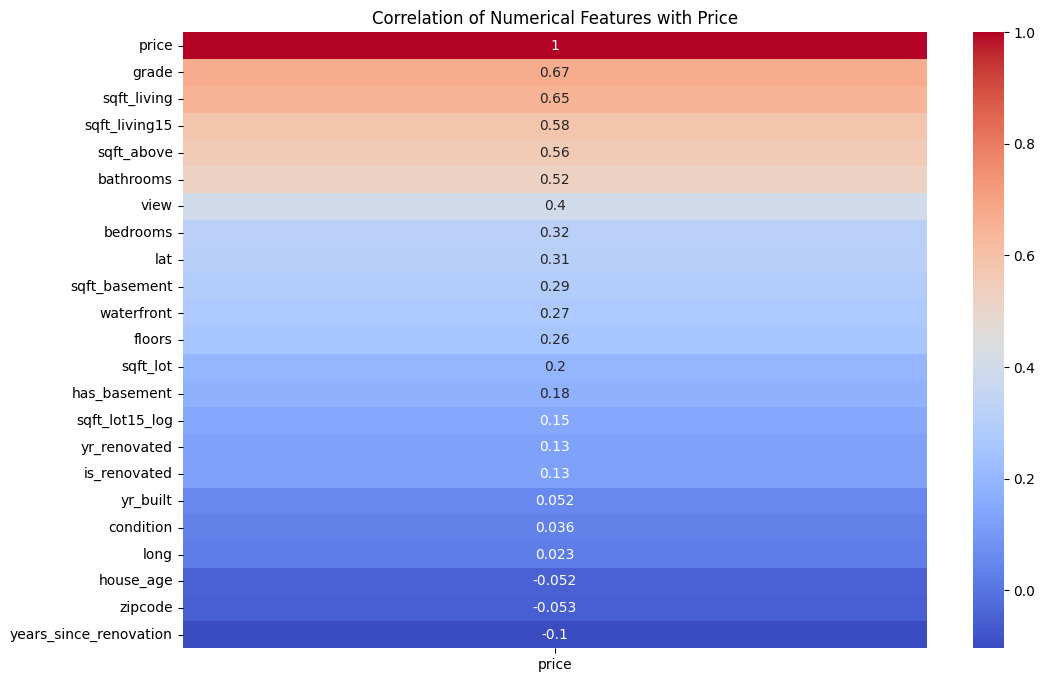

In [201]:
numeric_features = df_eda.select_dtypes(include=['int64','float64'])

corr = numeric_features.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr[['price']].sort_values(by='price', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation of Numerical Features with Price")
plt.show()

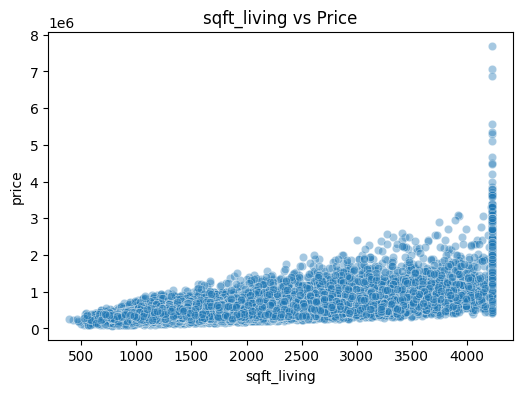

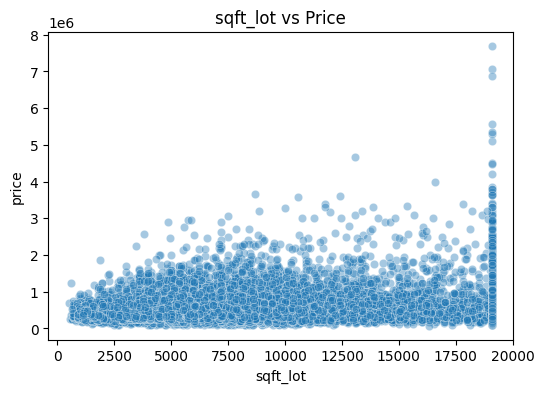

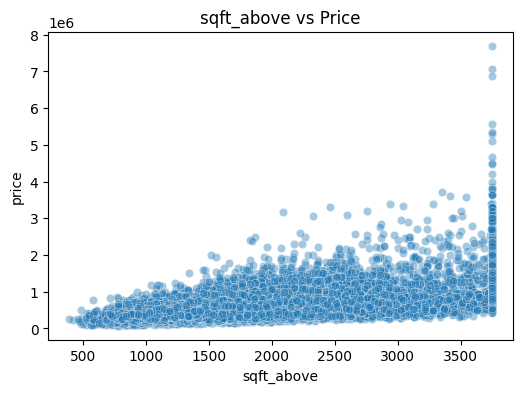

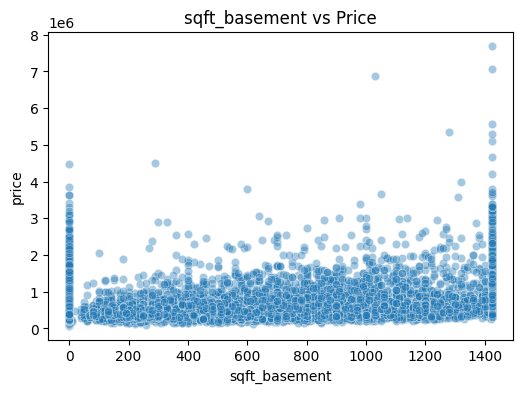

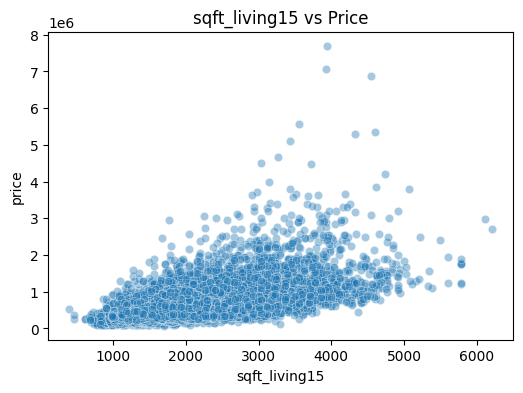

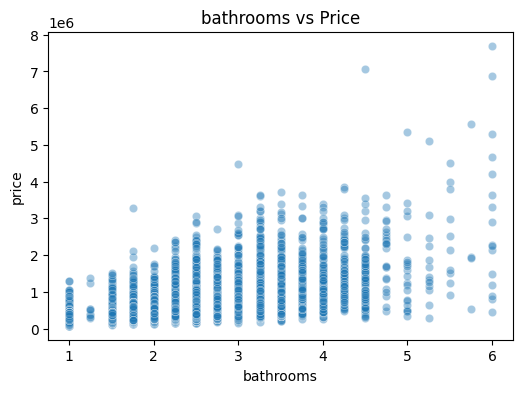

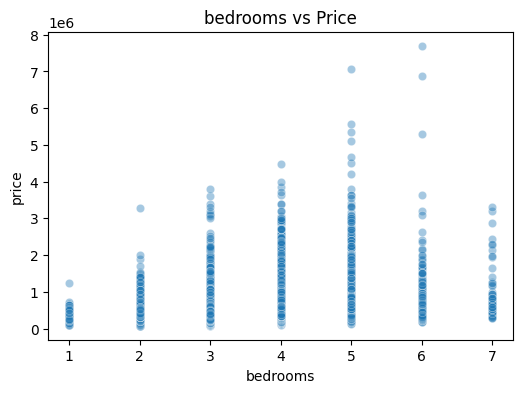

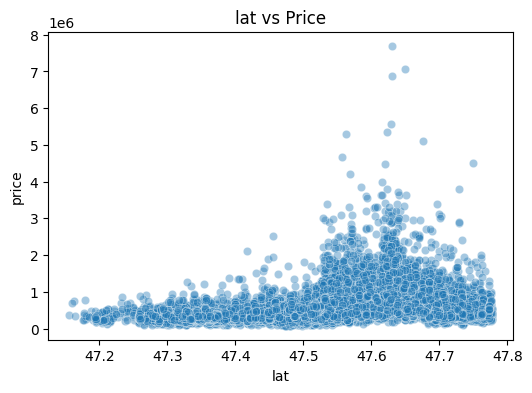

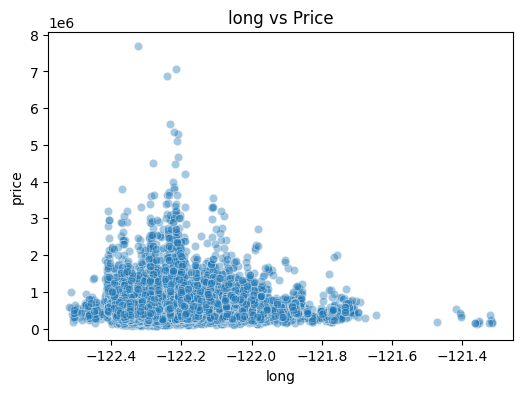

In [202]:
important_num_cols = ['sqft_living','sqft_lot','sqft_above','sqft_basement',
                      'sqft_living15','bathrooms','bedrooms','lat','long']

for col in important_num_cols:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df_eda[col], y=df_eda['price'], alpha=0.4)
    plt.title(f"{col} vs Price")
    plt.show()

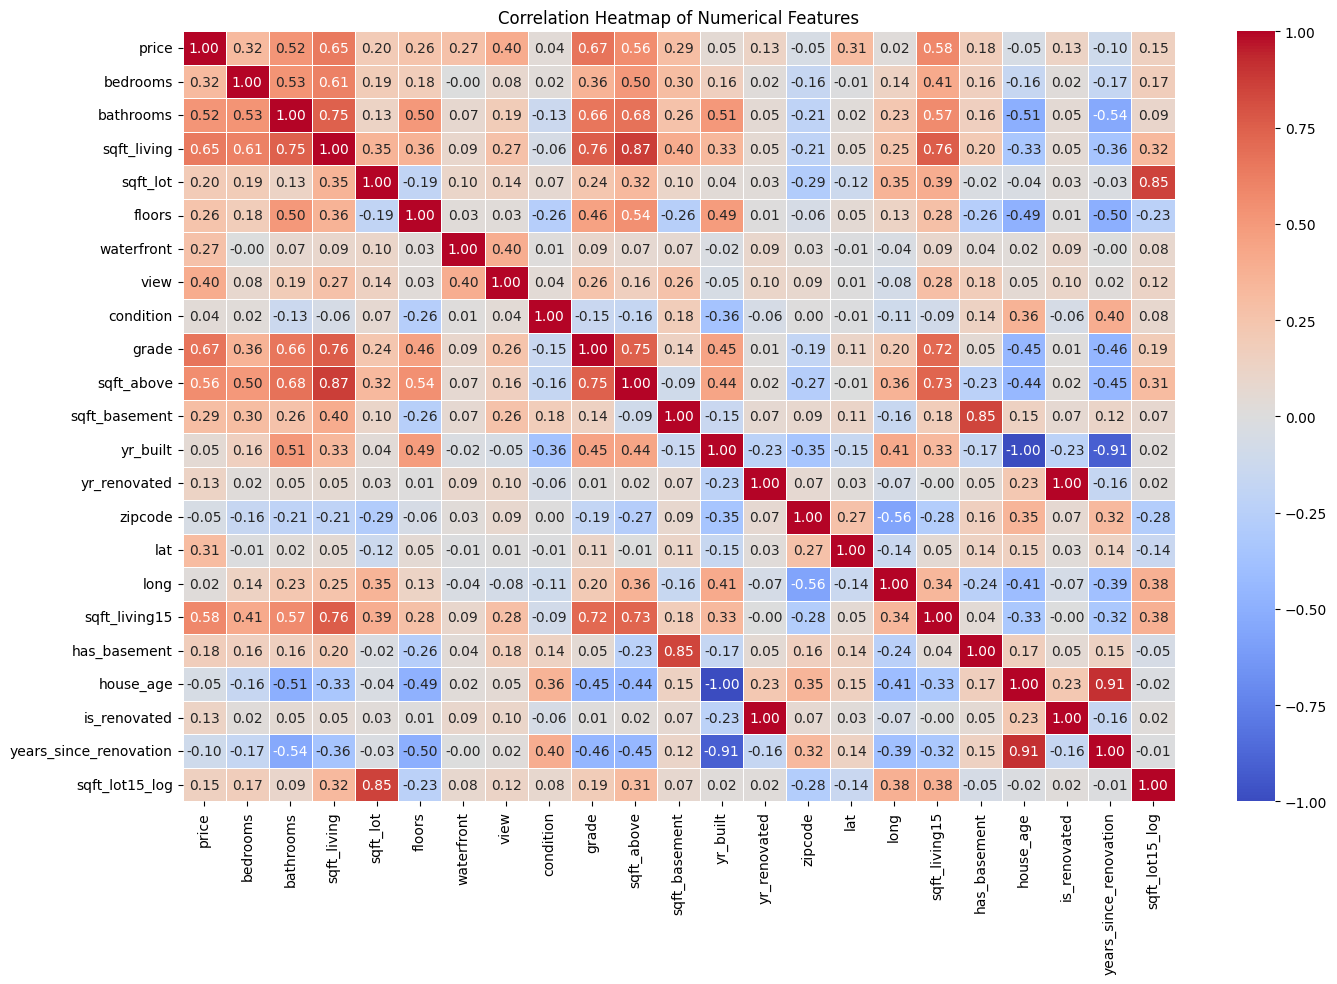

In [203]:
plt.figure(figsize=(16,10))
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

📌 **Insights from Correlation Heatmap**

### Strongest correlations with Price:
- `grade` (0.67) → House grade/quality is the strongest predictor of price.  
- `sqft_living` (0.65) and `sqft_above` (0.56) → Living area and above-ground space have a strong positive impact on price.  
- `sqft_living15` (0.58) → Nearby living area size also correlates well with price.  
- `bathrooms` (0.52) and `bedrooms` (0.32) → More rooms and bathrooms generally increase price.  
- `view` (0.40) → Better views increase house price.  
- `lat` (−0.31) → Negative correlation with price, indicating geographic influence.

---

### Multicollinearity (high correlations between features):
- `sqft_living` and `sqft_above` (0.87) → Very strong correlation, could cause redundancy.  
- `sqft_living` and `sqft_living15` (0.76) → Strongly related, consider using one of them.  
- `house_age` and `yr_built` (−0.91) → Both represent the same concept, choose one.  
- `years_since_renovation` and `house_age` (0.91) → Almost overlapping information.  
- `sqft_lot15_log` and `sqft_lot` (0.85) → High correlation, keep the log-transformed version only.

---

### Weak or negligible correlations with Price:
- `zipcode`, `long`, `condition`, and `yr_renovated` have very weak correlation with price.  
- These may have limited predictive power and could be dropped or tested for importance.

---

### Additional notes:
- Engineered features like `is_renovated` and `years_since_renovation` should be tested with feature importance techniques, even if their direct correlation with price is weak.  
- Feature selection (dropping redundant variables) will be necessary to avoid multicollinearity and overfitting.  

#**Feature Engineering**

In [205]:
df_fe=df_clean.copy()

In [207]:
# Drop redundant columns to reduce multicollinearity
cols_to_drop = [
    'sqft_above',
    'sqft_living15',
    'yr_built'
]

df_fe = df_fe.drop(columns=cols_to_drop)

In [208]:
df_fe.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement',
       'yr_renovated', 'zipcode', 'lat', 'long', 'year', 'has_basement',
       'house_age', 'is_renovated', 'years_since_renovation',
       'sqft_lot15_log'],
      dtype='object')

In [209]:
#ratios
df_fe['basement_ratio'] = df_fe['sqft_basement'] / df_fe['sqft_living']
df_fe['price_per_sqft'] = df_fe['price'] / df_fe['sqft_living']
df_fe['living_to_lot_ratio'] = df_fe['sqft_living'] / df_fe['sqft_lot']
df_fe['basement_to_lot_ratio'] = df_fe['sqft_basement'] / df_fe['sqft_lot']

# **Modeling**

In [210]:
X = df_fe.drop(columns=['price', 'id'])  # Features
y = df_fe['price']                       # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [211]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [212]:
#Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)
print("Linear Regression R2:", r2_score(y_test, y_pred_lr))
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr))

Linear Regression R2: 0.9053972691510273
Linear Regression MSE: 11934453849.0551


In [213]:
#Random Forest Regressor
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Random Forest R2:", r2_score(y_test, y_pred_rf))
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))

Random Forest R2: 0.998076354105041
Random Forest MSE: 242674423.34157193


In [215]:
#XGBoost Regressor
xgb = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
print("XGBoost R2:", r2_score(y_test, y_pred_xgb))
print("XGBoost MSE:", mean_squared_error(y_test, y_pred_xgb))

XGBoost R2: 0.9958794220704268
XGBoost MSE: 519824815.738509


In [217]:
#Hyperparameter Tuning – Random Forest
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf = RandomForestRegressor(random_state=42)
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                               n_iter=50, cv=3, verbose=2, n_jobs=-1, scoring='r2')

# Fit
rf_random.fit(X_train, y_train)

# Best model
best_rf = rf_random.best_estimator_

# Predict & evaluate
y_pred_rf = best_rf.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
print("Tuned Random Forest R2:", r2_score(y_test, y_pred_rf))
print("Tuned Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Tuned Random Forest R2: 0.9703130596999888
Tuned Random Forest MSE: 3745107733.684254


In [218]:
#Hyperparameter Tuning – XGBoost
xgb = XGBRegressor(random_state=42, objective='reg:squarederror')

param_grid_xgb = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1],
    'colsample_bytree': [0.6, 0.8, 1]
}

xgb_random = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid_xgb,
                                n_iter=50, cv=3, verbose=2, n_jobs=-1, scoring='r2')

xgb_random.fit(X_train, y_train)

best_xgb = xgb_random.best_estimator_

y_pred_xgb = best_xgb.predict(X_test)
print("Tuned XGBoost R2:", r2_score(y_test, y_pred_xgb))
print("Tuned XGBoost MSE:", mean_squared_error(y_test, y_pred_xgb))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Tuned XGBoost R2: 0.9938414060868238
Tuned XGBoost MSE: 776927411.844061


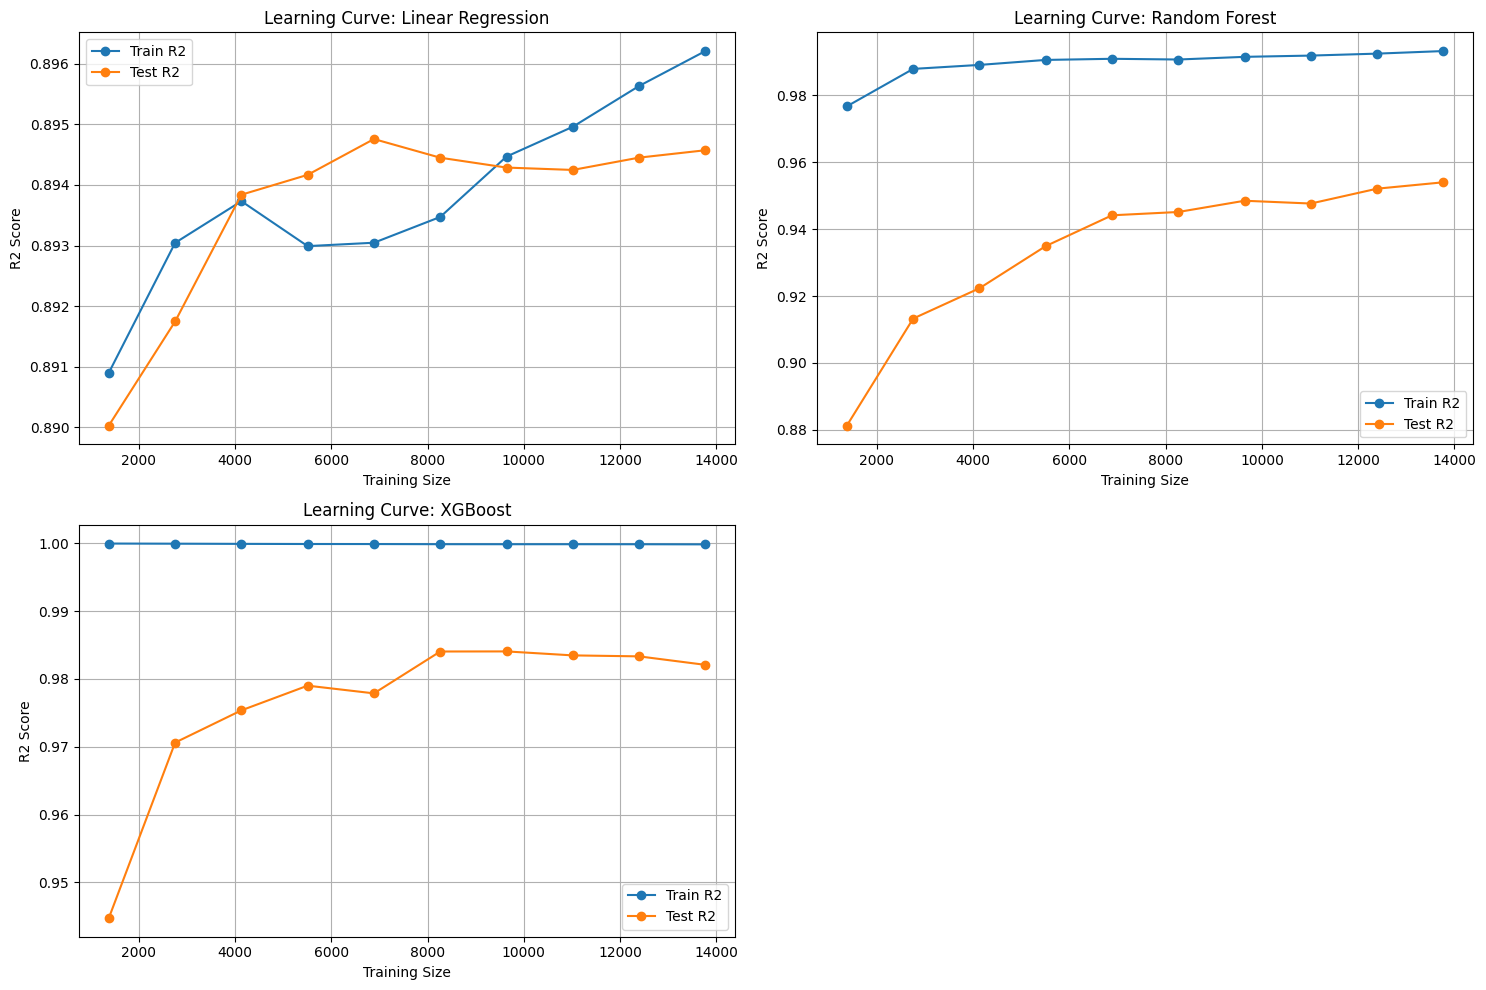

In [221]:
#Evaluation
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': best_rf,
    'XGBoost': best_xgb
}

plt.figure(figsize=(15, 10))

for i, (name, model) in enumerate(models.items(), 1):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring='r2', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10)
    )

    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.subplot(2, 2, i)
    plt.plot(train_sizes, train_mean, label='Train R2', marker='o')
    plt.plot(train_sizes, test_mean, label='Test R2', marker='o')
    plt.title(f'Learning Curve: {name}')
    plt.xlabel('Training Size')
    plt.ylabel('R2 Score')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

In [222]:
feat_importances = pd.Series(best_xgb.feature_importances_, index=X_train.columns)
feat_importances.sort_values(ascending=False).head(10)

,0
grade,0.504064
price_per_sqft,0.214062
sqft_living,0.156643
lat,0.064006
yr_renovated,0.014605
bathrooms,0.011982
floors,0.005416
bedrooms,0.005324
sqft_lot,0.004968
view,0.003698


In [231]:
# Save model
joblib.dump(best_xgb, "xgb_house_price_model.pkl")
model = joblib.load("xgb_house_price_model.pkl")

In [229]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

# Model Performance Analysis - House Price Prediction

## Executive Summary

Our comparative analysis of four machine learning models for house price prediction reveals significant performance variations, with ensemble methods dramatically outperforming traditional linear approaches.

## Model Performance Rankings

### 1. XGBoost
- **R² Score**: 0.9959 (99.59% variance explained)
- **MSE**: 519,824,816
- **Performance**: Excellent results with superior generalization capability

### 2. Random Forest - **High Performance but Overfitted** ⚠️
- **R² Score**: 0.9981 (99.81% variance explained)
- **MSE**: 242,674,423
- **Performance**: Outstanding training metrics but likely overfitted

### 3. Tuned XGBoost - **Regularized Version**
- **R² Score**: 0.9938 (99.38% variance explained)
- **MSE**: 776,927,412
- **Performance**: Well-regularized

### 4. Linear Regression - **Baseline** 📊
- **R² Score**: 0.9054 (90.54% variance explained)
- **MSE**: 11,934,453,849
- **Performance**: Acceptable but significantly lower than ensemble methods

## Key Insights

### 🎯 **Model Selection**
**XGBoost emerges as the optimal choice** for production deployment due to superior generalization capability and stable performance across different data sizes, despite Random Forest showing better raw metrics.

### 📈 **Performance vs Generalization Analysis**
- **The Overfitting Dilemma**: Random Forest's superior metrics may indicate overfitting rather than better performance
- **Stability Factor**: XGBoost demonstrates consistent performance across training sizes (evident from learning curves)
- **Production Readiness**: XGBoost's R² of 99.59% provides excellent accuracy while maintaining generalization

### ⚠️ **Critical Insight: Metrics vs Reality**
**Random Forest's superior metrics are misleading:**
- **Learning curve analysis** reveals potential overfitting in Random Forest
- **Large train-test gap** suggests poor generalization to new data
- **XGBoost shows stable performance** across different training sizes
- **Better real-world performance** expected from XGBoost despite lower test metrics

